In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import numpy as np
import pygritbx as pgt

In [2]:
# Unit vecotrs for reference frame
i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])
referenceFrame = np.array([i, j, k])

In [3]:
# Axial dimensions
a = 79 # [mm]
b = 70.5 # [mm]
c = 59.25 # [mm]
# From technical drawing and bearing's width
offset = 46 - 16 # [mm]

In [4]:
# Input motor
input_motor = pgt.Motor(name="Input Motor", loc=0, power=31.5*1e3, n=1500, axis=k)

In [5]:
# Material
gear_material = pgt.Material("Steel", sigma_u=1060, sigma_y=930, sigma_Dm1=0, HB=700)
A2_material = pgt.Material("16MnCr5", sigma_u=1060, sigma_y=930, sigma_Dm1=700, HB=0)

In [6]:
# Gears
# G1
G1 = pgt.Gear(name="G1", axis=k, loc=a+b, m_n=3, z=16, psi=-15, phi_n=20, Q_v=8, FW=45, material=gear_material)
# G2
G2 = pgt.Gear(name="G2", axis=k, loc=a+b+offset, m_n=3, z=48, psi=15, phi_n=20, Q_v=8, FW=45, material=gear_material)
# G3
G3 = pgt.Gear(name="G3", axis=k, loc=a+offset, m_n=4, z=21, psi=-15, phi_n=20, Q_v=8, FW=56, material=gear_material)
# G4
G4 = pgt.Gear(name="G4", axis=k, loc=a, m_n=4, z=63, psi=15, phi_n=20, Q_v=8, FW=56, material=gear_material) 

In [7]:
# Supports
# A
A = pgt.Support(name="A", type="Roller", bearingType="Cylindrical", catalogueName="NU 206 ECP", 
                     catalogueType="Explorer", d=30, D=62, B=16, C=44*1e3, C0=36.5*1e3, Pu=4.5*1e3, nr=13*1e3,
                     a=8, e=0.3, Y=0.4, Y1=0,kr=0.15, shoulder=1, arr="Single", axis=k, loc=0)
# B
B = pgt.Support(name="B", type="Pin", bearingType="Tapered", catalogueName="30206 DF", 
                     catalogueType="Explorer", d=30, D=62, B=34.5, C=85.7*1e3, C0=88*1e3, Pu=9.65*1e3, nr=7500,
                     a=17.25, e=0.37, Y0=1.8, Y1=1.8, Y2=2.7, shoulder=-1, arr="F2F", axis=k, loc=a+b+c)
# C
C = pgt.Support(name="C", type="Roller", bearingType="Cylindrical", catalogueName="NU 209 ECP", 
                     catalogueType="Explorer", d=45, D=85, B=19, C=69.5*1e3, C0=64*1e3, Pu=8.15*1e3, nr=9*1e3,
                     a=9.5, e=0.3, Y=0.4, kr=0.15, shoulder=1, arr="Single", axis=k, loc=offset)
# D
D = pgt.Support(name="D", type="Pin", bearingType="Tapered", catalogueName="32011 X/DF", 
                     catalogueType="Explorer", d=55, D=90, B=46, C=170*1e3, C0=232*1e3, Pu=26*1e3, nr=4500,
                     a=23, e=0.4, Y0=1.6, Y1=1.7, Y2=2.5, arr="F2F", axis=k, loc=a+b+c+offset)
# E
E = pgt.Support(name="E", type="Roller", bearingType="Cylindrical", catalogueName="NU 2210 ECP", 
                     catalogueType="Explorer", d=50, D=90, B=23, C=90*1e3, C0=88*1e3, Pu=11.4*1e3, nr=8500,
                     a=11.5, e=0.3, Y=0.4, kr=0.2, shoulder=1, arr="Single", axis=k, loc=0)
# F
F = pgt.Support(name="F", type="Pin", bearingType="Tapered", catalogueName="32011 X/DF", 
                     catalogueType="Explorer", d=55, D=90, B=46, C=170*1e3, C0=232*1e3, Pu=26*1e3, nr=4500,
                     a=23, e=0.4, Y0=1.6, Y1=1.7, Y2=2.5, arr="F2F", axis=k, loc=a+b+c)

In [8]:
# Output Component
output = pgt.Component(name="Output", material=None, axis=k, loc=a+b+c+80)

In [9]:
# Gearbox Configuration
# Shaft A1
A1 = pgt.Shaft(name="A1", inputs=[input_motor], outputs=[G1], axis=k, material=None, sups=np.array([A, B]), loc=[0, 0, 0])
# Mesh M1
M1 = pgt.GearMesh(name="M1", drivingGear=G1, drivenGear=G2, radiality=[i], type="External")
# Shaft A2
A2 = pgt.Shaft(name="A2", inputs=[G2], outputs=[G3], axis=k, material=A2_material, sups=np.array([C, D]))
# Mesh M2
M2 = pgt.GearMesh(name="M2", drivingGear=G3, drivenGear=G4, radiality=[i], type="External")
# Shaft A3
A3 = pgt.Shaft(name="A3", inputs=[G4], outputs=[output], axis=k, material=None, sups=np.array([E, F]))

In [10]:
# Shaft A1
A1.solve()

Checking torque equilibrium for A1.
A1 does not mainatain a torque equilibrium.
Checking solvability for A1.
Solving torque equilibrium for A1.
Torque equilibrium for A1 is solved.
Checking torque equilibrium for G1.
G1 does not mainatain a torque equilibrium.
Checking solvability for G1.
Solving forces on G1 due to mesh M1.
Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Checking force equilibrium on A1.
A1 does not maintain a force equilibrium.
Checking force equilibrium on A1.
A1 maintains a force equilibrium.


In [11]:
# Gear G1
G1.solve()

Checking torque equilibrium for G1.
G1 mainatains a torque equilibrium.
Nothing to be solved for G1.


In [12]:
# Gear G2
G2.solve()

Checking torque equilibrium for G2.
Checking solvability for G2.
Solving torque equilibrium for G2.
Checking torque equilibrium for G2.
G2 mainatains a torque equilibrium.


In [13]:
# Shaft A2
A2.solve()

Checking torque equilibrium for A2.
A2 does not mainatain a torque equilibrium.
Checking solvability for A2.
Solving torque equilibrium for A2.
Torque equilibrium for A2 is solved.
Checking torque equilibrium for G3.
G3 does not mainatain a torque equilibrium.
Checking solvability for G3.
Solving forces on G3 due to mesh M2.
Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Checking force equilibrium on A2.
A2 does not maintain a force equilibrium.
Checking force equilibrium on A2.
A2 maintains a force equilibrium.


In [14]:
# Gear G3
G3.solve()

Checking torque equilibrium for G3.
G3 mainatains a torque equilibrium.
Nothing to be solved for G3.


In [15]:
# Gear G4
G4.solve()

Checking torque equilibrium for G4.
Checking solvability for G4.
Solving torque equilibrium for G4.
Checking torque equilibrium for G4.
G4 mainatains a torque equilibrium.


In [16]:
G4.ETs[0].torque

array([   0.        ,    0.        , 1804.81705466])

In [17]:
# Update output force
Fout_r = np.abs(np.sum(G4.ETs[0].torque)) / 0.25 * i
Fout_a = 0.25 * np.abs(np.sum(Fout_r)) * (k)
Fout = pgt.Force(Fout_a + Fout_r, output.abs_loc)
A3.outputs[0].updateEFs([Fout])

In [18]:
# Shaft A3
A3.solve()

Checking torque equilibrium for A3.
A3 does not mainatain a torque equilibrium.
Checking solvability for A3.
Solving torque equilibrium for A3.
Torque equilibrium for A3 is solved.
Checking force equilibrium on A3.
A3 does not maintain a force equilibrium.
Checking force equilibrium on A3.
A3 maintains a force equilibrium.


In [19]:
# Reaction on A1
A.F_tot.force, B.F_tot.force

(array([1120.59633936, 2290.78897174,    0.        ]),
 array([1920.60591153, 5780.13419874, 2162.59734571]))

In [20]:
# Reaction on A2
C.F_tot.force, D.F_tot.force

(array([  3921.71762195, -10890.56818574,      0.        ]),
 array([ -1749.43029988, -11016.22327701,   1544.71238979]))

In [21]:
# Reaction on A3
E.F_tot.force, F.F_tot.force

(array([1842.8285398 , 8599.77921399,    0.        ]),
 array([-14275.58633141,   5236.08907827,  -5512.12679016]))

In [22]:
# Shaft A2 Profile
shaftProfile = pgt.ShaftProfile(name="A2 Profile",
                                     radii=np.array([42.5, 45, 45, 42.5, 42.5, 45, 45, 52, 52, G3.d_f, G3.d_f, 62, 62, 56, 56, 55, 55, 50, 50])/2, 
                                     locs=np.array([0, 1, 5.9, 6, 7.84, 7.85, 45.9, 46, 80.9, 81, 136.9, 137, 156.9, 157, 204.9, 205, 267.9, 268, 288]))
# Refine profile's resolution
refinedProfile = shaftProfile.refineProfile(name="A2 Refined Profile", delta=0.1)
# Add fillets to refined profile
refinedProfile.addFillet(radius=1.5, quadrant=[1, 2], zOff=44.5, dOff=22.5)
refinedProfile.addFillet(radius=5, quadrant=[2], zOff=76, dOff=31)
refinedProfile.addFillet(radius=2, quadrant=[1], zOff=139, dOff=33)
refinedProfile.addFillet(radius=1, quadrant=[1], zOff=158, dOff=29)
refinedProfile.addFillet(radius=1.5, quadrant=[1, 2], zOff=206.5, dOff=27.5)
# Add profile to shaft
A2.addProfile(profile=refinedProfile)

In [ ]:
# Shaft A2 Sections
# Section V1
v1 = pgt.ShaftSection(name="V1", loc=a+offset, d=G3.d_f, Ra=1.6, material=A2.material)
v1.appendKf(Kf=np.array([1.2, 1.5]), loadType=np.array(["Bending", "Torsion"]))
# After looking at the internal loads and stresses, I decided to define the following additional sections
# Slightly before V1
v1_b = pgt.ShaftSection(name="V1_b", loc=a+offset-0.1, d=G3.d_f, Ra=1.6, material=A2.material)
v1_b.appendKf(Kf=np.array([1.2, 1.5]), loadType=np.array(["Bending", "Torsion"]))
# Slightly after V1
v1_a = pgt.ShaftSection(name="V1_a", loc=a+offset+0.1, d=G3.d_f, Ra=1.6, material=A2.material)
v1_a.appendKf(Kf=np.array([1.2, 1.5]), loadType=np.array(["Bending", "Torsion"]))
# Section V2
v2 = pgt.ShaftSection(name="V2", loc=a+G3.FW/2+4+offset, d=62, Ra=1.6, material=A2.material)
v2.addNotchSensitivity(notchRadius=2, sigma_u=A2.material.sigma_u)
v2.addGeometricStressRaiser(r2d=2/62, D2d=G3.d_f/62)
# Section V3
v3 = pgt.ShaftSection(name="V3", loc=a+b-G2.FW/2+3+offset, d=62, Ra=1.6, material=A2.material)
v3.addNotchSensitivity(notchRadius=1, sigma_u=A2.material.sigma_u)
v3.addGeometricStressRaiser(r2d=1/56, D2d=62/56)
# Section V4
v4 = pgt.ShaftSection(name="V4", loc=a+b-0.1+offset, d=56, Ra=1.6, material=A2.material)
v4.appendKf(Kf=np.array([1.6, 1.2]), loadType=np.array(["Bending", "Torsion"]))
# Add to shaft
userSections = np.array([v1_b, v1, v1_a, v2, v3, v4])
A2.addSections(sections=userSections)

Initiating static verification on shaft A2.
Calculating internal loads on shaft A2.


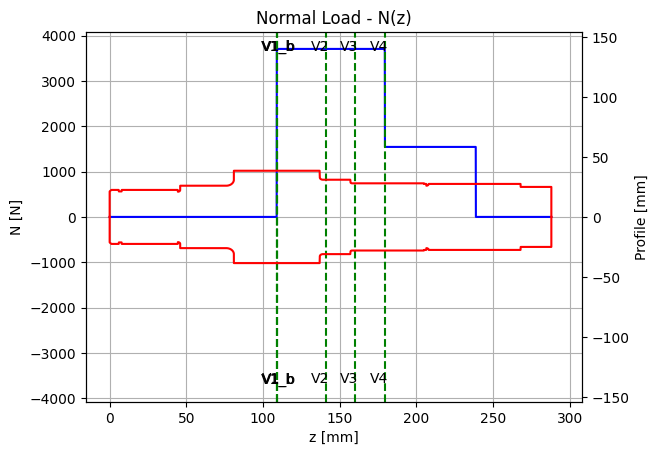

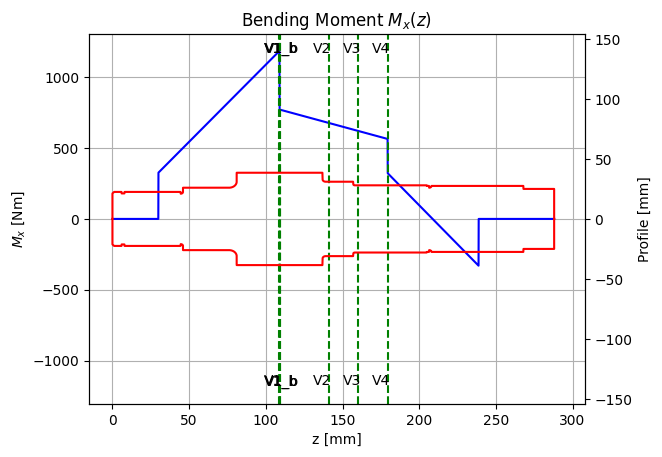

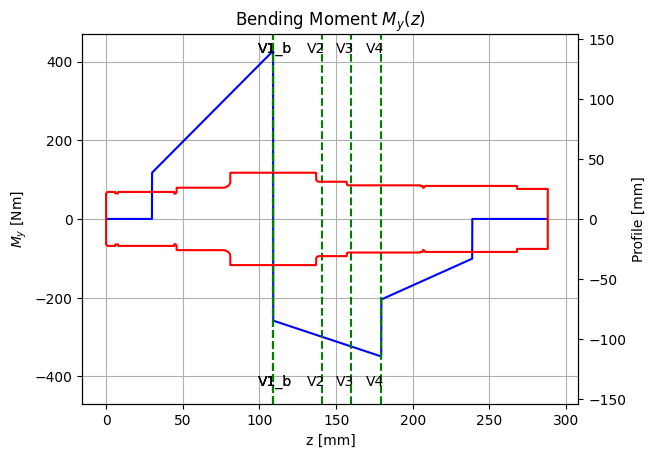

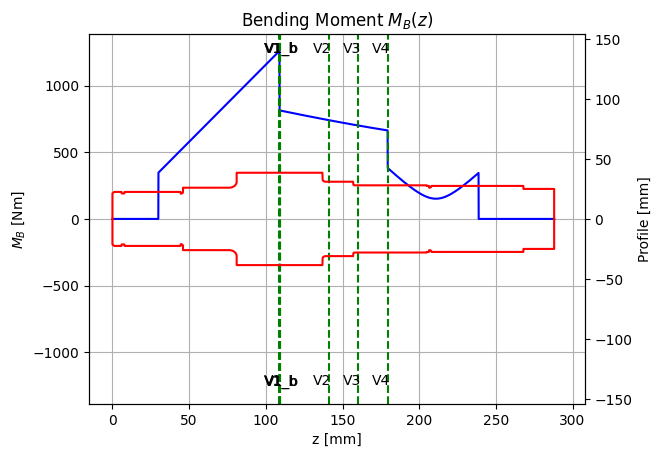

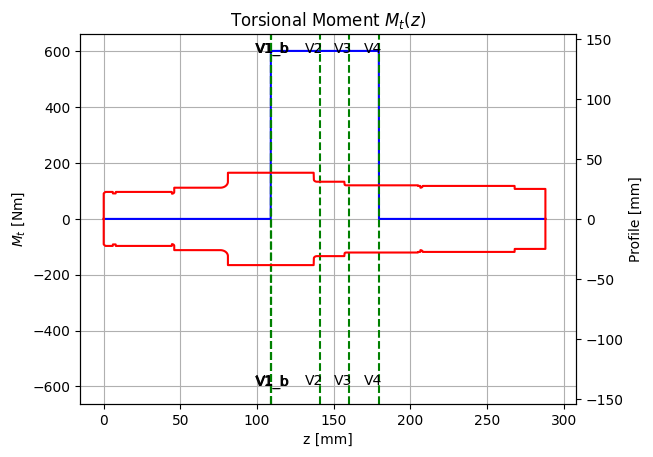

Calculating stresses on shaft A2 along profile 'A2 Refined Profile'.


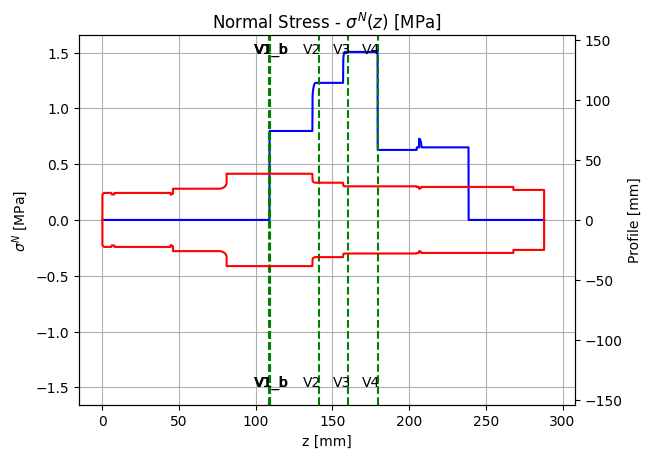

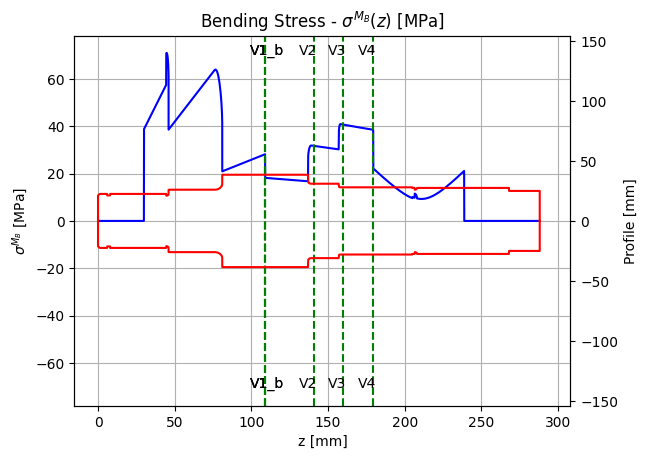

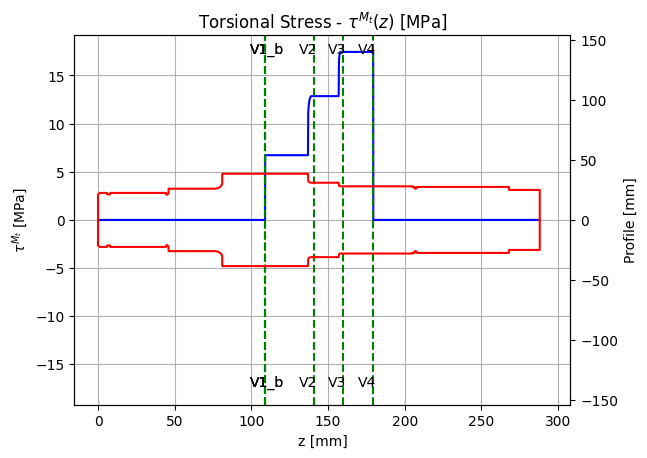

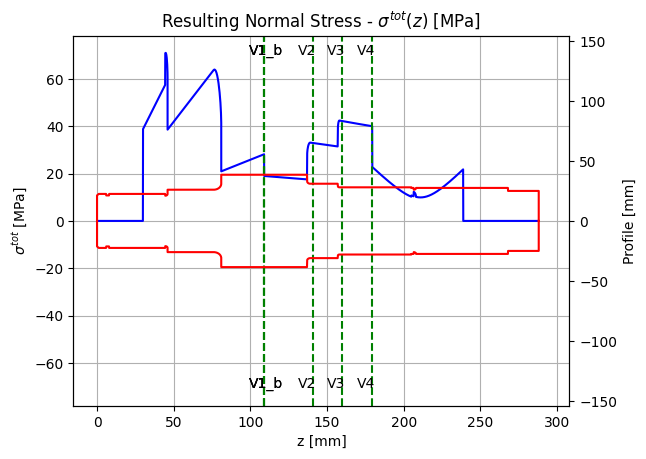

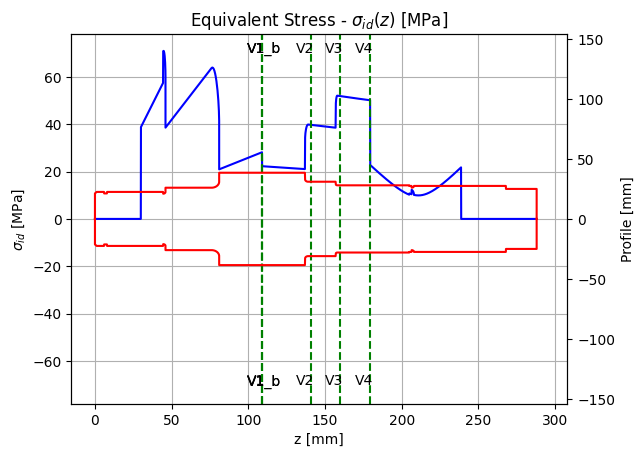

Calculating static safety factor for every user-defined section.
Section Name: Static Safety Factor
Section V1_b: 33.02 [-].
Section V1: 41.76 [-].
Section V1_b: 41.76 [-].
Section V2: 23.41 [-].
Section V3: 17.92 [-].
Section V4: 18.54 [-].


In [24]:
# Perform static verification on shaft A2
A2.performStaticVerification(RF=referenceFrame)

Initiating fatigue verification on shaft A2.
Internal loads for shaft A2 already calculated.


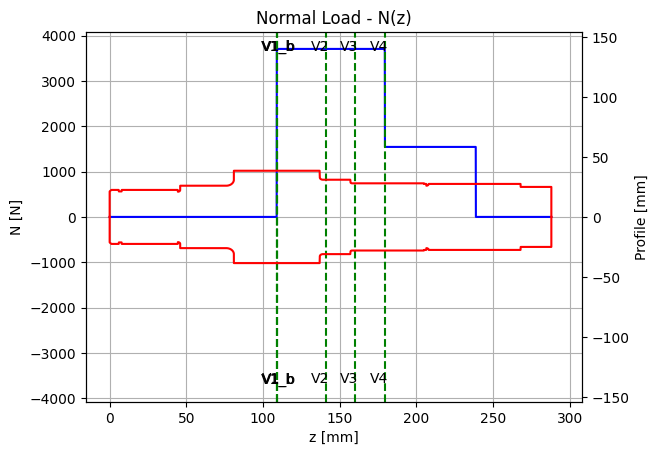

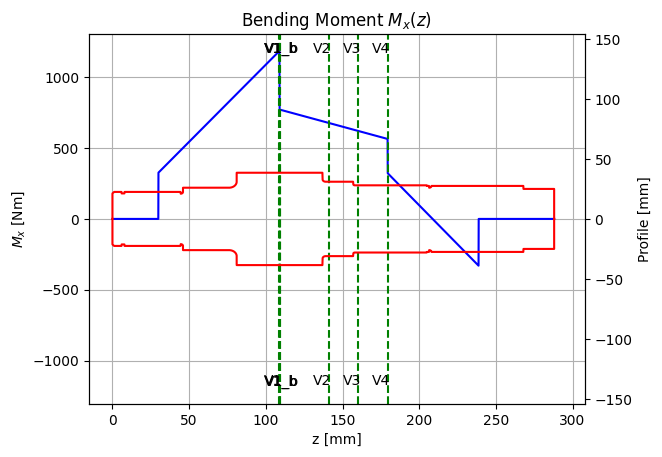

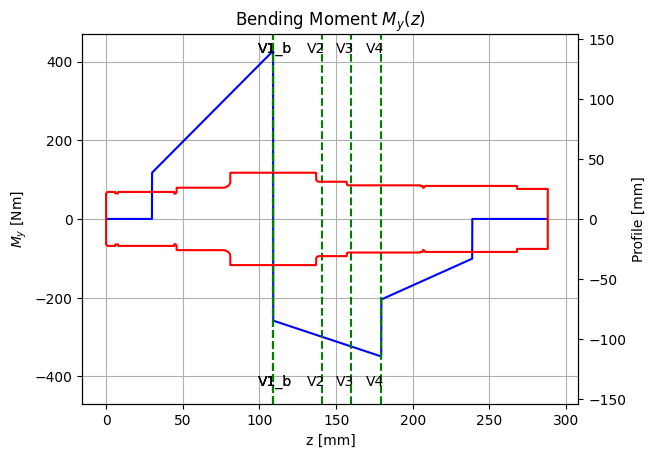

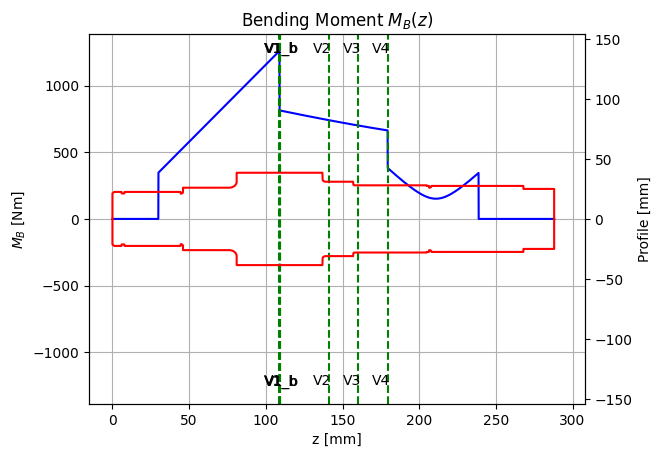

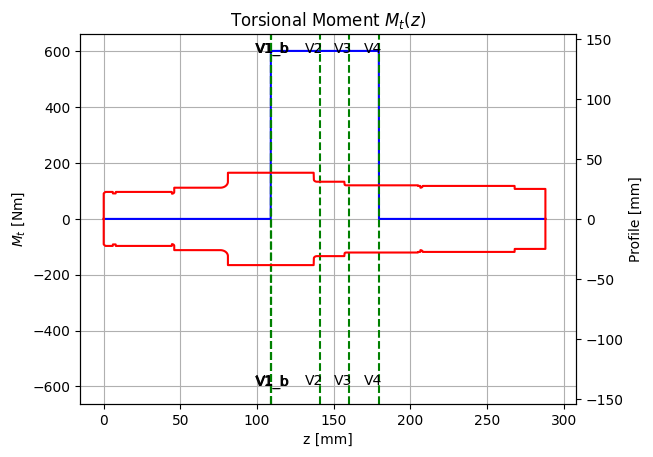

Calculating stresses on shaft A2 along profile 'A2 Refined Profile'.


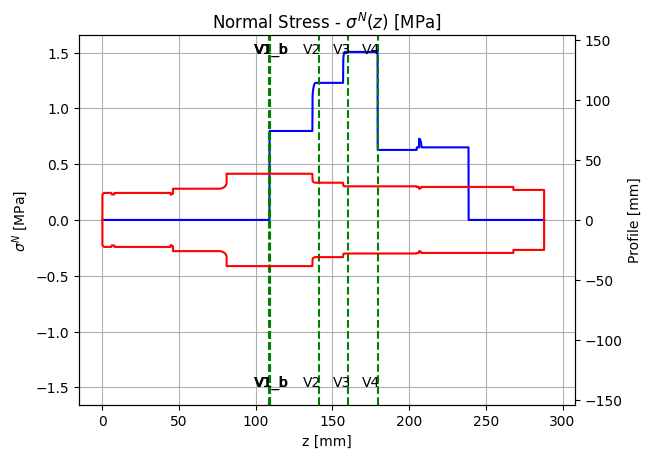

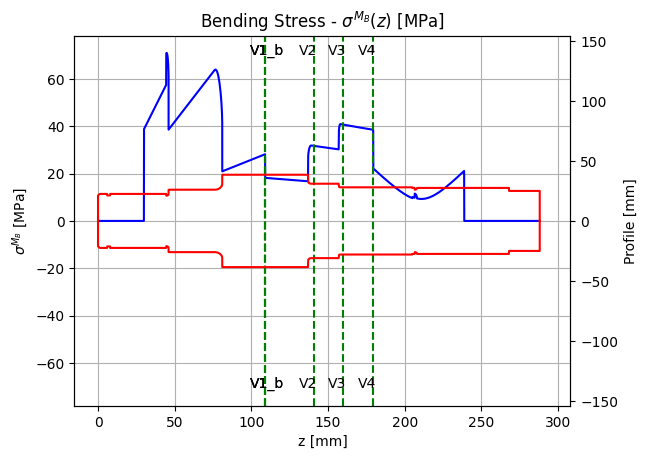

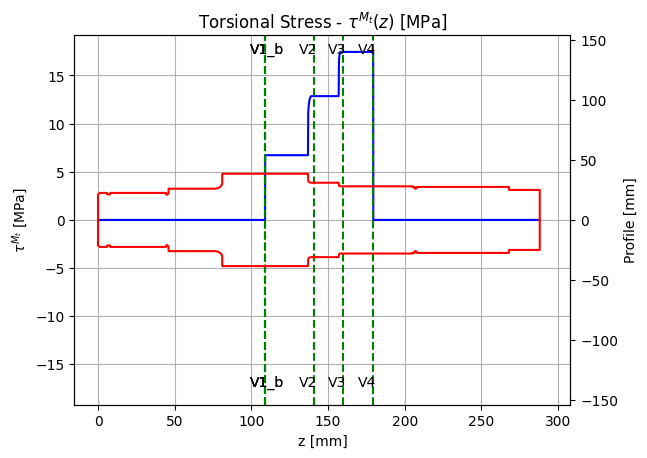

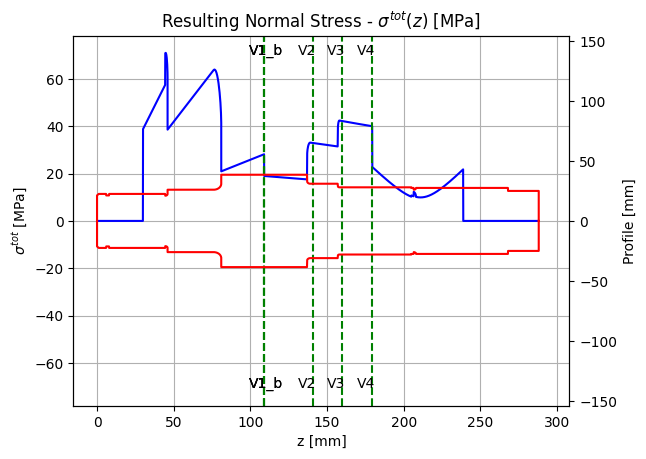

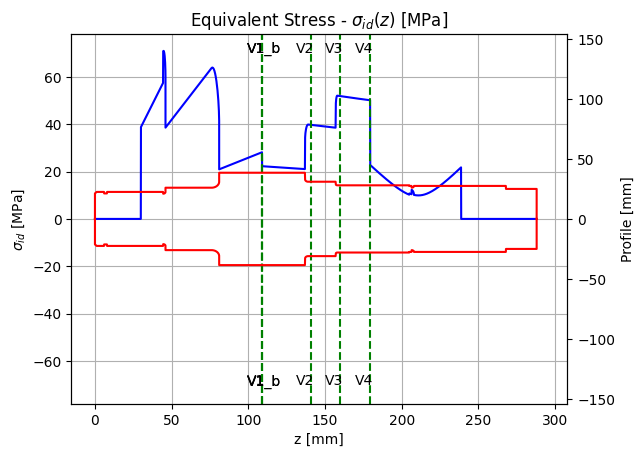

Calculating mean and alternating stresses for every user-defined section.
Calculating fatigue limit corrector factors on every user-defined section.
Calculating equivalent mean and alternating stresses along every user-defined section.


/home/rmhuneineh/miniforge3/envs/pygrit/lib/python3.11/site-packages/numpy/lib/_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

In [25]:
# Perform fatigue verification on shaft A2
A2.performFatigueVerification(RF=referenceFrame)

In [ ]:
G3.analyseGearToothBending(mesh=M2, powerSource="Uniform", drivenMachine="Uniform", dShaft=52, Ce=1,
                           teethCond="uncrowned teeth", lShaft=a+b+c, useCond="Commercial, enclosed units", sigma_FP=860, b_YN=1.3558,
                           e_YN=-0.0178, N=1e8, temp=60, rel=0.99)

In [ ]:
G3.analyseGearToothPitting(mesh=M2, Z_R=1, sigma_HP=1470, b_ZN=1.4488, e_ZN=-0.023, N=1e8)

In [ ]:
# Define oil of choice
oil = pgt.Oil(name="ISO VG 220", temp=60, v1=60, v=86)

In [ ]:
A.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=8, oil=oil)

In [ ]:
B.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=3.2, oil=oil)

In [ ]:
C.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=4.7, oil=oil)

In [ ]:
D.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=6.4, oil=oil)

In [ ]:
E.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=4.01, oil=oil)

In [ ]:
F.performLifeAnalysis(rel=90, condition="Normal cleanliness", a_skf=1.93, oil=oil)